# 鳶尾花(Iris)品種的辨識

## 1. 載入相關套件

In [2]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 載入資料集

In [3]:
ds = datasets.load_iris()

## 2. 資料清理、資料探索與分析

In [4]:
# 資料集說明
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
import pandas as pd
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# 觀察資料集彙總資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
# 描述統計量
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# 集中
df['sepal length (cm)'].mean(), df['sepal length (cm)'].median(), df['sepal length (cm)'].mode()

(5.843333333333334,
 5.8,
 0    5.0
 Name: sepal length (cm), dtype: float64)

In [11]:
# 計算變異數(variance)、標準差(standard deviation)、IQR
df['sepal length (cm)'].var(), df['sepal length (cm)'].std(), \
    df['sepal length (cm)'].quantile(.75) - df['sepal length (cm)'].quantile(.25)

(0.6856935123042505, 0.8280661279778629, 1.3000000000000007)

In [12]:
# 計算偏態(skewness)及峰度(kurtosis)
df['sepal length (cm)'].skew(), df['sepal length (cm)'].kurt()

(0.3149109566369728, -0.5520640413156395)

In [14]:
# 自行計算偏態
mean1 = df['sepal length (cm)'].mean()
std1  = df['sepal length (cm)'].std()
n = len(df['sepal length (cm)'])
skew1  = (((df['sepal length (cm)'] - mean1)/std1)**3).sum() * n / ((n-1) * (n-2))
skew1

0.31491095663697277

In [38]:
# 自行計算峰度
M2  = (((df['sepal length (cm)'] - mean1)/std1)**2).mean()
M4  = (((df['sepal length (cm)'] - mean1)/std1)**4).mean()
K = (M4 / (M2 ** 2)) 
K-3 

-0.5735679489249756

In [39]:
from scipy.stats import kurtosis
print(kurtosis(df['sepal length (cm)'], axis=0, bias=True))

-0.5735679489249765


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Count'>

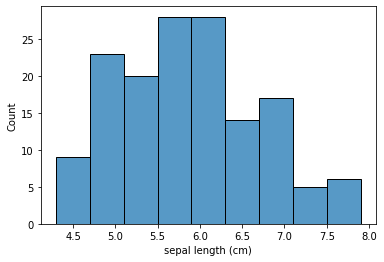

In [47]:
# 直方圖
import seaborn as sns

sns.histplot(x='sepal length (cm)', data=df)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

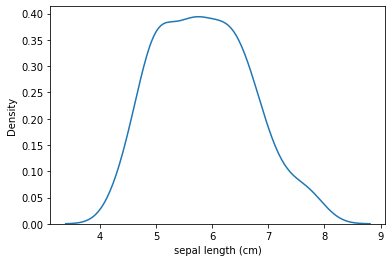

In [48]:
# 直方圖平滑化
sns.kdeplot(x='sepal length (cm)', data=df)

0    1.127846
dtype: float64

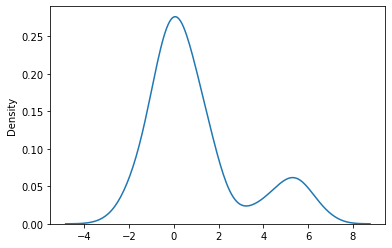

In [59]:
# 右偏
import numpy as np

data1 = np.random.normal(0, 1, 500)
data2 = np.random.normal(5, 1, 100)
data = np.concatenate((data1,data2))
sns.kdeplot(data=data)
pd.DataFrame(data).skew()

0   -1.246997
dtype: float64

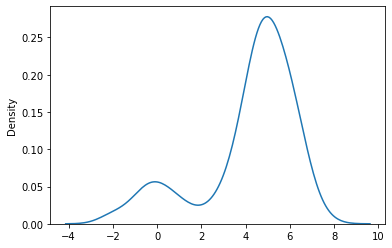

In [60]:
# 右偏
import numpy as np

data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(5, 1, 500)
data = np.concatenate((data1,data2))
sns.kdeplot(data=data)
pd.DataFrame(data).skew()

## 關聯度

In [25]:
df['y'] = y
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
y,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

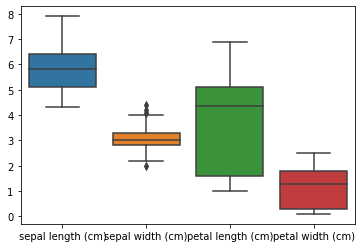

In [87]:
# 箱型圖
sns.boxplot(data=df)

In [88]:
# 是否有含遺失值(Missing value)
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## 繪圖

<AxesSubplot:ylabel='count'>

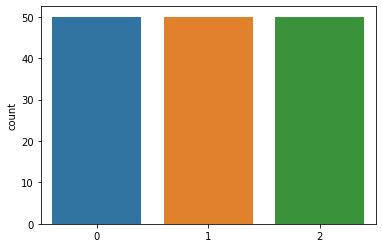

In [89]:
# y 各類別資料筆數統計
import seaborn as sns
sns.countplot(x=y)

In [90]:
# 以Pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

0    50
1    50
2    50
dtype: int64

## 3. 不須進行特徵工程

## 4. 資料分割

In [91]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [92]:
y_train

array([2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0,
       2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 2, 2, 0])

## 特徵縮放

In [93]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [94]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [95]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型計分

In [96]:
y_pred = clf.predict(X_test_std)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0,
       1, 0, 1, 1, 1, 1, 2, 2])

In [97]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

93.33%


In [98]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 7  0  0]
 [ 0 13  1]
 [ 0  1  8]]


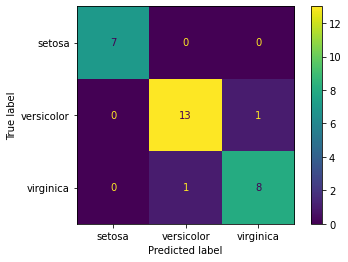

In [99]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.show()

## 8. 模型評估，暫不進行

## 9. 模型佈署

In [100]:
# 模型存檔
import joblib

joblib.dump(clf, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib');

## 10.模型預測，請參見 01_05_iris_prediction.py